In [27]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import time
import os
import yaml
import pickle

from utils import convert_opt_path

%load_ext autoreload
%autoreload 2

def load_opt_path(experiment_folder, process_id):
    with open(os.path.join(experiment_folder, process_id, "results.pkl"), "rb") as f:
        all_paths = pickle.load(f)
    return all_paths

%matplotlib inline
plt.rcParams['figure.figsize'] = [12,8]
plt.style.use('ggplot')
plt.rcParams['lines.markersize'] = 8
plt.rcParams.update({'font.size': 12})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:

exp_root_path = "/Users/daniellengyel/curr_adventure/experiments/IPM/"

def add_exp(name, exp_folder, exp_id, res_dict):
    opt_path_raw = load_opt_path(exp_root_path + exp_folder, exp_id)
    opt_path = convert_opt_path(opt_path_raw)
#     opt_path[:, 1] -= opt_path[1, 1]
    res_dict[name] = opt_path
    return res_dict

res_dict = {}

# res_dict = add_exp("Exact Gradient", "Linear_Nov09_20-35-15_Daniels-MBP-4", "1636490115.031866", res_dict)
# res_dict = add_exp("Hessian Conditioned FD", "Linear_Nov09_20-35-25_Daniels-MBP-4", "1636490125.626948", res_dict)
# res_dict = add_exp("Central Differences", "Linear_Nov09_20-35-45_Daniels-MBP-4", "1636490145.620676", res_dict)

res_dict = add_exp("Exact Gradient", "Linear_Nov09_20-44-42_Daniels-MBP-4", "1636490682.7909539", res_dict)
res_dict = add_exp("Hessian Conditioned FD", "Linear_Nov09_20-51-07_Daniels-MBP-4", "1636491067.391158", res_dict)
res_dict = add_exp("Central Differences", "Linear_Nov09_20-48-24_Daniels-MBP-4", "1636490904.729513", res_dict)


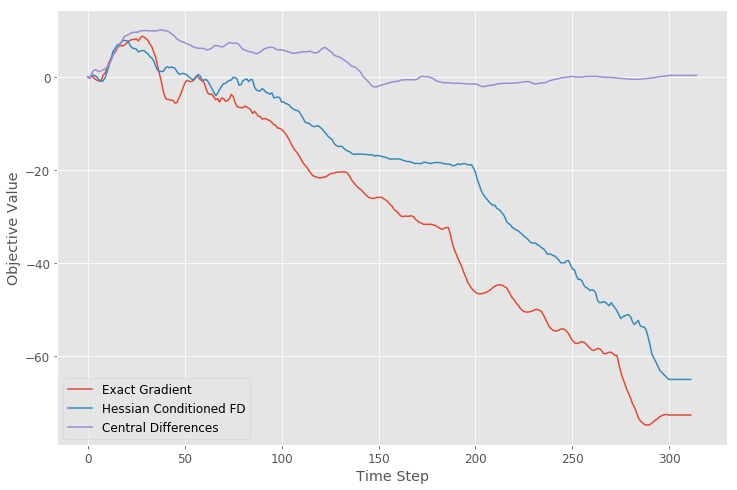

In [31]:
for k, p in res_dict.items():
    plt.plot(p[:, 0], label=k)

plt.legend()
# plt.ylim(-6000, -5500)
plt.xlabel("Time Step")
plt.ylabel("Objective Value")
# plt.yscale('log')
plt.show()

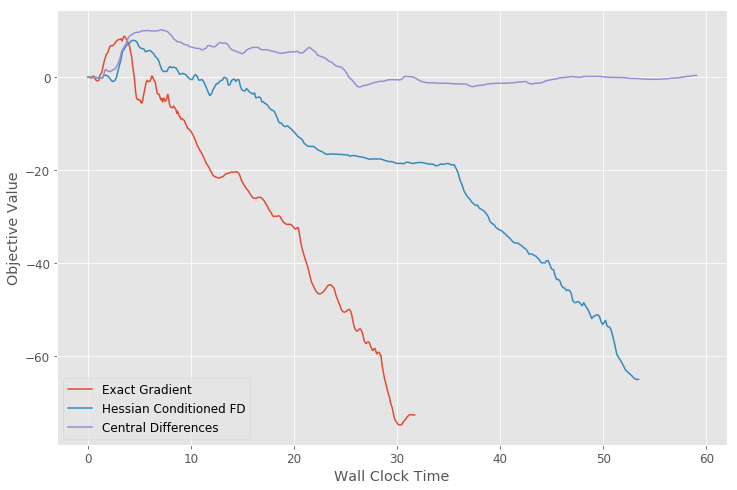

In [32]:
for k, p in res_dict.items():
    plt.plot(p[:, 1], p[:, 0], label=k)


plt.legend()
# plt.ylim(-6000, -5500)
plt.xlabel("Wall Clock Time")
plt.ylabel("Objective Value")
# plt.yscale('log')
plt.show()